# Chart of half-lives using NNDC data

Here is a screenshot of isotope half-lives from the [National Nuclear Data Center](https://www.nndc.bnl.gov/chart/reColor.jsp?newColor=t12). Let's recreate some of this chart using data retrieved from that system.

<img src="figures/nndc_chart_halflife.png" style="width: 750px;" align="left"/><img src="figures/nndc_chart_halflife_key.png" style="width: 150px;" align="left"/>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import becquerel as bq

This function will provide the color scale given the half-life:

In [2]:
def colorscale_halflife(data):
    """Color scale to mimic NNDC's nuclear chart half-life color scale."""
    if len(data) == 0:
        return 'white'
    half_life = data['T1/2 (s)']
    # choose the longest-lived isomer
    half_life = max(half_life)
    if half_life < 1e-15:
        return '#FF9473'
    elif half_life < 1e-7:
        return '#F7BDDD'
    elif half_life < 1e-6:
        return '#FFC6A5'
    elif half_life < 1e-5:
        return '#FFE7C6'
    elif half_life < 1e-4:
        return '#FFFF9B'
    elif half_life < 1e-3:
        return '#FFFF0C'
    elif half_life < 1e-2:
        return '#E7F684'
    elif half_life < 1e-1:
        return '#D6EF38'
    elif half_life < 1e0:
        return '#ADDE63'
    elif half_life < 1e1:
        return '#53B552'
    elif half_life < 1e2:
        return '#64BDB5'
    elif half_life < 1e3:
        return '#63C6DE'
    elif half_life < 1e4:
        return '#03A5C6'
    elif half_life < 1e5:
        return '#0A9A94'
    elif half_life < 1e7:
        return '#0284A5'
    elif half_life < 1e10:
        return '#3152A5'
    elif half_life < 1e15:
        return '#29016B'
    elif half_life > 1e15:
        return 'black'
    else:
        return '#E1E1E1'

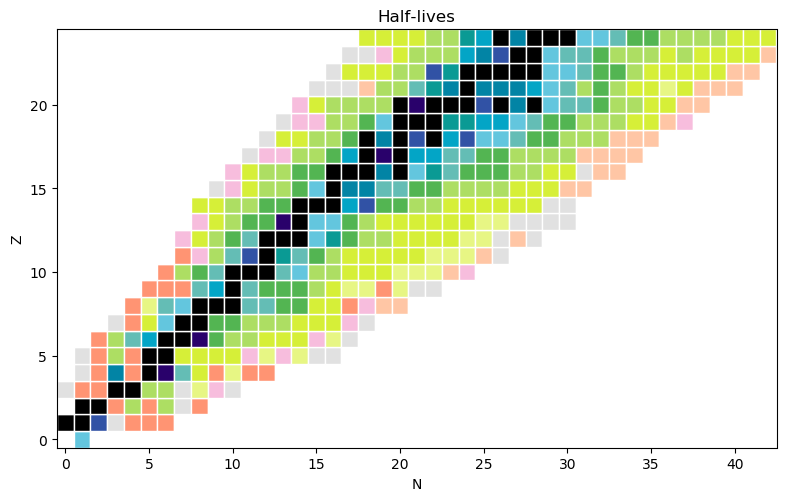

In [3]:
Z_RANGE = (0, 25)
N_RANGE = (0, 43)
data = bq.tools.fetch_wallet_card(z_range=Z_RANGE, n_range=N_RANGE)

fig1 = plt.figure(figsize=(8, 6), dpi=100)
ax1 = fig1.add_subplot(111, aspect='equal')
for z in range(Z_RANGE[0], Z_RANGE[1]):
    for n in range(N_RANGE[0], N_RANGE[1]):
        isotope = (data['Z'] == z) & (data['N'] == n)
        if len(isotope) == 0:
            continue
        facecolor = colorscale_halflife(data[isotope])
        ax1.add_patch(
            patches.Rectangle(
                (n - 0.5, z - 0.5), 1, 1,
                edgecolor='white', facecolor=facecolor
            )
        )
plt.xlim(N_RANGE[0] - 0.5, N_RANGE[1] - 0.5)
plt.ylim(Z_RANGE[0] - 0.5, Z_RANGE[1] - 0.5)
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Half-lives')
plt.tight_layout()
plt.show()

How did we do?

<img src="figures/nndc_chart_halflife.png" style="width: 750px;" align="left"/><img src="figures/nndc_chart_halflife_key.png" style="width: 150px;" align="left"/>

# Chart showing decay modes

Let's try making the chart showing the decay mode instead. Here is the [chart from NNDC](https://www.nndc.bnl.gov/chart/reColor.jsp?newColor=dm).

In [4]:
def main_decaymode(data):
    """Determine the main decay mode of the isotope."""
    if len(data) == 0:
        return 'None'
    # look for a stable isomer
    if 'STABLE' in list(data['T1/2 (txt)']):
        return 'Stable'
    hl = np.array(data['T1/2 (s)'])
    if np.isinf(max(hl)):
        return 'Stable'
    if len(data) == 1:
        mode = list(data['Decay Mode'])[0]
        if mode != '':
            return mode
        else:
            return 'Unknown'
    # choose the longest-lived isomer
    data = data[(hl == max(hl)) & np.isfinite(hl)]
    if len(data) == 0:
        return 'Unknown'
    if len(data) == 1:
        mode = list(data['Decay Mode'])[0]
        if mode != '':
            return mode
        else:
            return 'Unknown'
    # find the decay mode with the highest branching ratio
    br = np.array(data['Branching (%)'])
    data2 = data[np.isfinite(br)]
    if len(data2) == 0:
        mode = ''.join(list(data['Decay Mode']))
        if mode != '':
            return mode
        else:
            return 'Unknown'
    if len(data2) == 1:
        mode = list(data2['Decay Mode'])[0]
        if mode != '':
            return mode
        else:
            return 'Unknown'
    br = np.array(data2['Branching (%)'])
    data3 = data2[br == max(br)]
    if len(data3) == 0:
        return 'Unknown'
    if len(data3) == 1:
        mode = list(data3['Decay Mode'])[0]
        if mode != '':
            return mode
        else:
            return 'Unknown'
    # if we end up with multiple modes, join into one string
    return ''.join(list(data3['Decay Mode']))


def colorscale_decaymode(mode):
    """Color scale to mimic NNDC's nuclear chart decay mode color scale."""
    if mode == 'None':
        return 'white'
    elif mode == 'Stable':
        return 'black'
    elif 'A' in mode:
        return '#FEFD56'
    elif 'EC' in mode or 'B+' in mode or 'EP' in mode or 'IT' in mode:
        return '#67C6DC'
    elif 'N' in mode:
        return '#9C7DBB'
    elif 'P' in mode:
        return '#FD9477'
    elif 'B-' in mode:
        return '#E68EC5'
    elif 'SF' in mode:
        return '#55B457'
    else:
        return '#E0E0E0'

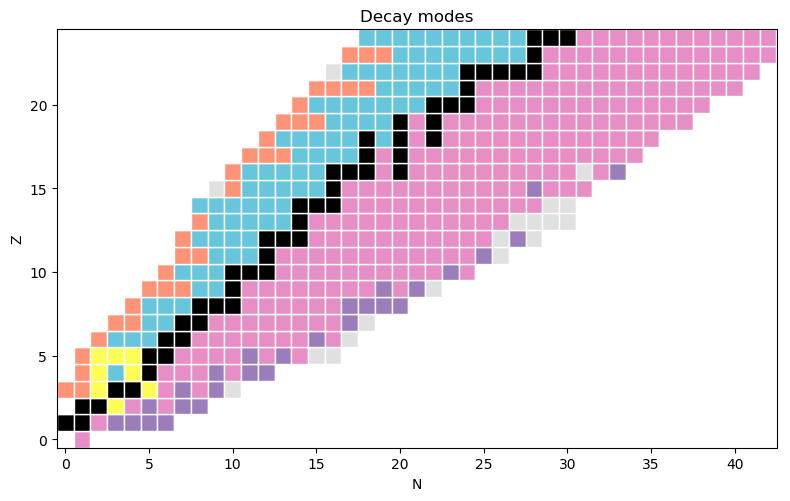

In [5]:
fig2 = plt.figure(figsize=(8, 6), dpi=100)
ax2 = fig2.add_subplot(111, aspect='equal')
for z in range(Z_RANGE[0], Z_RANGE[1]):
    for n in range(N_RANGE[0], N_RANGE[1]):
        isotope = (data['Z'] == z) & (data['N'] == n)
        if len(isotope) == 0:
            continue
        mode = main_decaymode(data[isotope])
        facecolor = colorscale_decaymode(mode)
        if facecolor == '#E0E0E0' and mode != 'Unknown':
            print('Z = {}, N = {}, mode = {}'.format(z, n, mode))
        ax2.add_patch(
            patches.Rectangle(
                (n - 0.5, z - 0.5), 1, 1,
                edgecolor='white', facecolor=facecolor
            )
        )
plt.xlim(N_RANGE[0] - 0.5, N_RANGE[1] - 0.5)
plt.ylim(Z_RANGE[0] - 0.5, Z_RANGE[1] - 0.5)
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Decay modes')
plt.tight_layout()
plt.show()

How did we do? Pretty close.

<img src="figures/nndc_chart_decay.png" style="width: 750px;" align="left"/><img src="figures/nndc_chart_decay_key.png" style="width: 90px;" align="left"/>